In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

directory = '/home/nathan/Documents/FYP_code/LSTM1_guillermo/grouping_2/'
with open(directory + 'labels/name_of_labels_original.txt') as f:
    name_labels = np.asarray([word for line in f for word in line.split()])
    
colors = ['#5fdda2', '#b68fd8', '#924fbc', '#cd89e5', '#edffaf', '#ccedff',
          '#6cd86f', '#3a8dc1', '#13d343', '#fca105', '#7ae8cc', '#d341af', 
          '#2b90d8', '#d12d1b', '#e5e37e', '#f9ad84', '#eda371', '#d1a570', 
          '#915251', '#4412a8', '#5c359e', '#0cad8a', '#1ebcaa', '#a179ce', 
          '#6c52c9', '#0f991d', '#e8772c', '#574bf4', '#e84762', '#fcf8ab', 
          '#70d39e', '#a3bc01', '#caed93', '#d99aed', '#dd77d8', '#4bd15a', 
          '#dda58b', '#f2a4e2', '#f7b2c6', '#24ada1', '#f79f2c', '#929cf4', 
          '#230b7a', '#37efc4', '#778bef']

colors2 = np.append (
          ['#e6194b','#3cb44b','#ffe119','#0082c8','#f58231','#911eb4','#46f0f0',
           '#f032e6','#d2f53c','#fabebe','#008080','#e6beff','#aa6e28','#fffac8',
           '#800000','#aaffc3','#808000','#ffd8b1','#000080','#808080','#FFFFFF',
           '#000000'] , colors[22:] )

In [10]:
#VAE
n_latent = 8 #change here to load new z [8, 16, 32, 45]
location = '/home/nathan/Documents/FYP_code/LSTM1_guillermo/VAE_embedding/'
z = np.load(location+ 'z_' + str(n_latent)+ '.npy') #numpy array
z_test = np.load(location + 'z_test_' + str(n_latent)+ '.npy')

#RNN
#location = '/home/nathan/Documents/FYP_code/LSTM1_guillermo/RNN_embedding/'
#z = np.load(location+ 'scores_45.npy') #numpy array
# z_test = z = np.load(location + 'scores_45_test.npy')

#regardless
test_labels = np.load(location + 'test_labels.npy') 
true_labels = np.load(location + 'true_labels.npy') #numpy array
n_action_samples = np.load(location + 'n_action_samples.npy') #numpy array

#check
print('z.shape', z.shape, 'true_labels.shape', true_labels.shape, 'z_test.shape', z_test.shape, 'test_labels', test_labels.shape, 'n_action_samples.shape', n_action_samples.shape)
#To save smg, use:
#location = '/home/nathan/Documents/FYP_code/LSTM1_guillermo/VAE_embedding/n_action_samples'
#np.save(location, n_action_samples) 

('z.shape', (595, 8), 'true_labels.shape', (595,), 'z_test.shape', (569, 8), 'test_labels', (569,), 'n_action_samples.shape', (45,))


** Functions definition **

In [4]:
#Display confidence level bar histogram 
def confidence_probability (scores, g_labels, cluster_number, cluster_size):
    
    y = scores
    x = range(len(scores)) 
    
        
    plt.figure(figsize=(20,4))
    plt.ylim(0,100)
        
    barlist = plt.bar(x,y, width=0.7)

    #import randomcolor
    #num_classes = len(g_labels)
    #colors = randomcolor.RandomColor().generate(count=num_classes) #as many group or actions

    
    for i in range(len(barlist)): barlist[i].set_color(colors[i])
    
    plt.title('Cluster '+str(cluster_number+1)+'/'+str(K)+' with '+str(cluster_size)+'/595 ('+str(100*cluster_size/595)+'%) samples', fontsize=18)
    
    if cluster_number == 0 : plt.xticks(x, g_labels, rotation=90, fontsize=18)
    plt.ylabel('Percentage of samples in this cluster')
    
    plt.show()

In [5]:
def confidence_probability_cluster (scores, members, g_labels, K):
    
    #maybe reorder to have similar clusters next to each other
    
    y = scores
    x = range(len(scores)) 
    
    plt.figure(figsize=(20,4))
    plt.ylim(0,100)
    
    barlist = plt.bar(x,y, width=0.7)
    
    for i in range(len(barlist)): barlist[i].set_color(colors2[members[i]]) #color for cluster memberships
    
    count = sum([i >= 50 for i in y])
    percent = 100*count / len(y)
    plt.title(str(K) + ' clusters representation (' +str(percent) + '% or '+ str(count) + ' actions above 50% occurence)' , fontsize=18)
    
    plt.xticks(x, g_labels, rotation=90, fontsize=18)
    plt.ylabel('Percentage of samples in the cluster')
    ax = plt.gca()
    #ax.yaxis.grid(linestyle='dashed', color='gray')
    
    #draw 50% line
    extended_x = np.append(np.append(-1,  range(len(scores))) , len(scores))
    ax.plot(extended_x, np.full(len(extended_x),50) , linestyle='--', dashes=(5, 5), color='black')
    
    plt.show()

In [6]:
def plot_inertia(sse):
    
    plt.figure()
    
    from matplotlib.ticker import MaxNLocator
    ax = plt.figure().gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.xlabel("Number of cluster")
    plt.ylabel("SSE")
    plt.show()
    print('sse', sse)

def plot_accuracy(acc):

    plt.figure()
    
    from matplotlib.ticker import MaxNLocator
    ax = plt.figure().gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    
    plt.plot(range(2,Kmax+1), acc*100)
    plt.xlabel("Number of clusters")
    plt.ylabel("Group recognition accuracy (%)")
    plt.show()

** KMEANS from here **


 Accuracy 3 clusters 66.08 % 



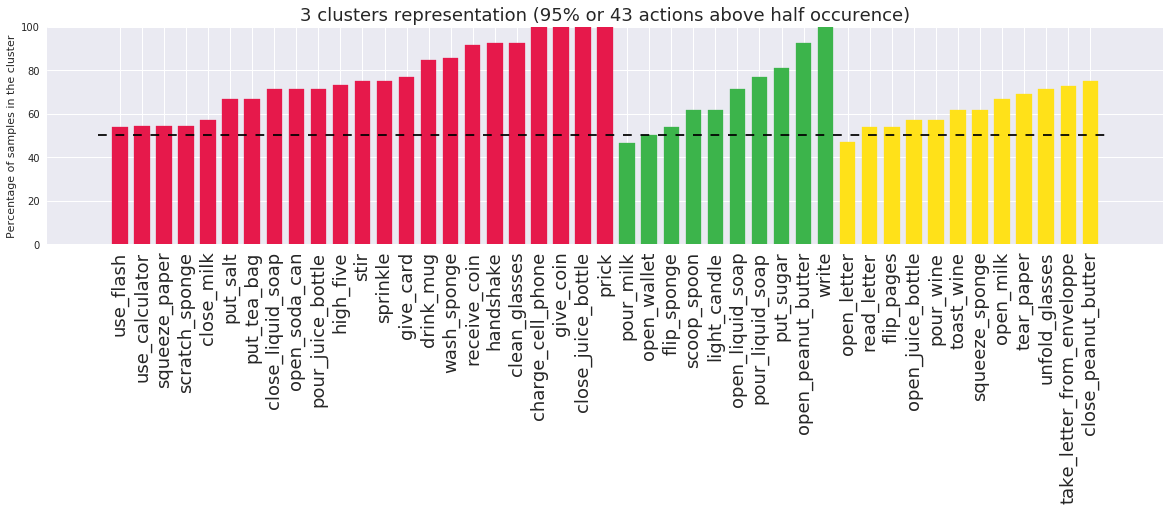


 Accuracy 4 clusters 55.18 % 



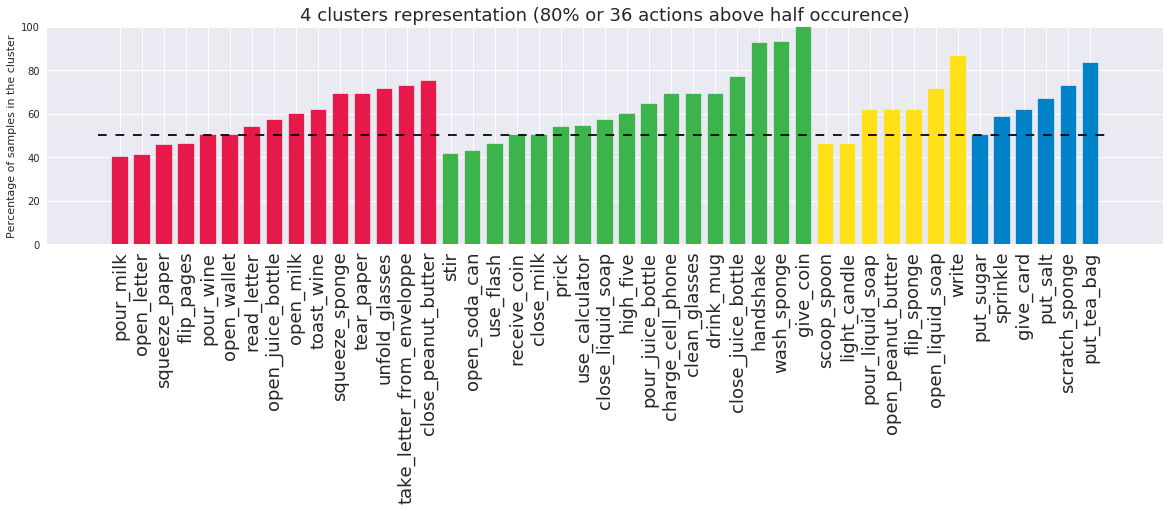


 Accuracy 5 clusters 54.31 % 



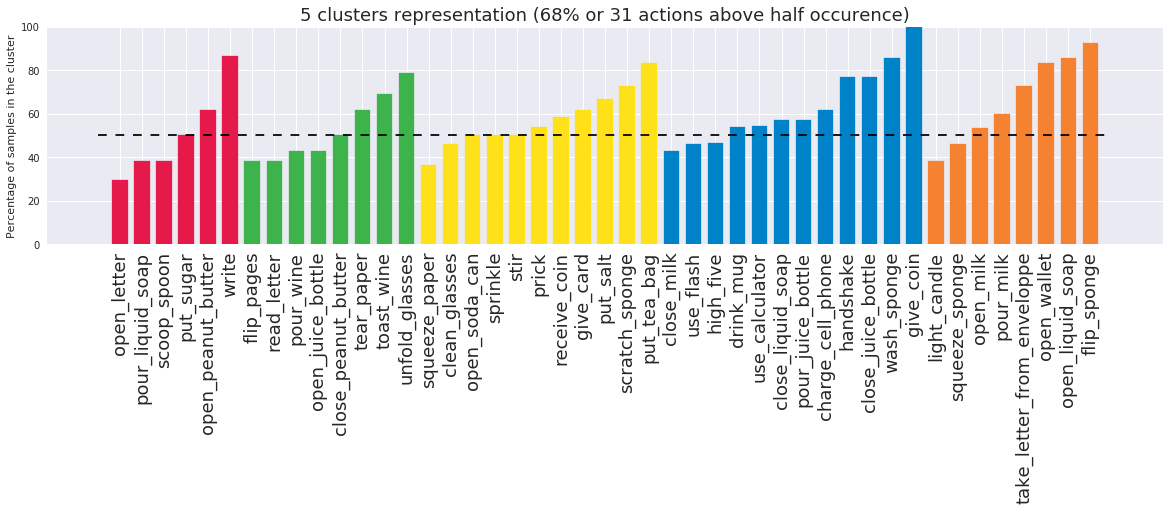


 Accuracy 6 clusters 46.92 % 



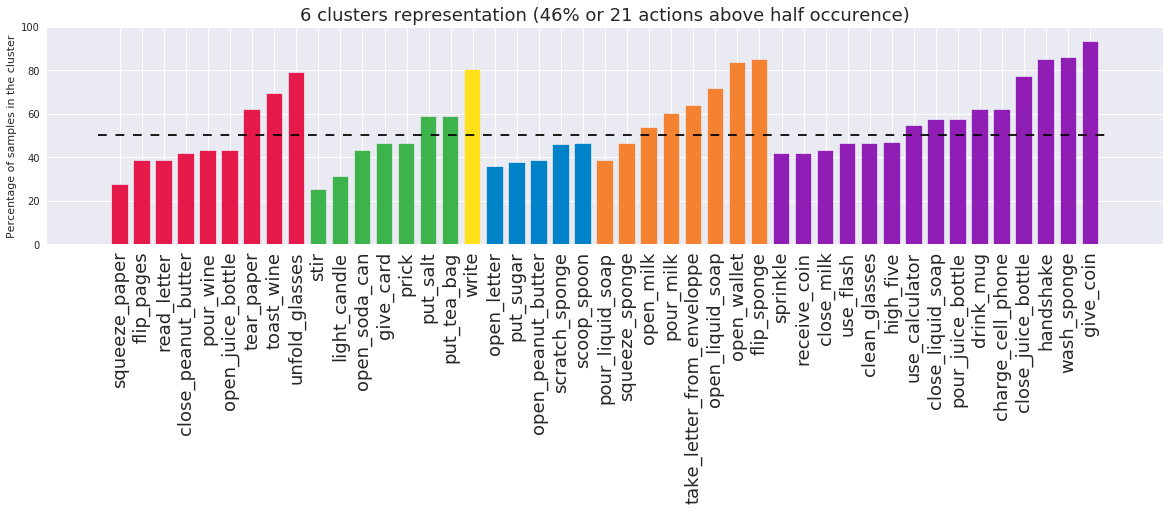


 Accuracy 7 clusters 42.53 % 



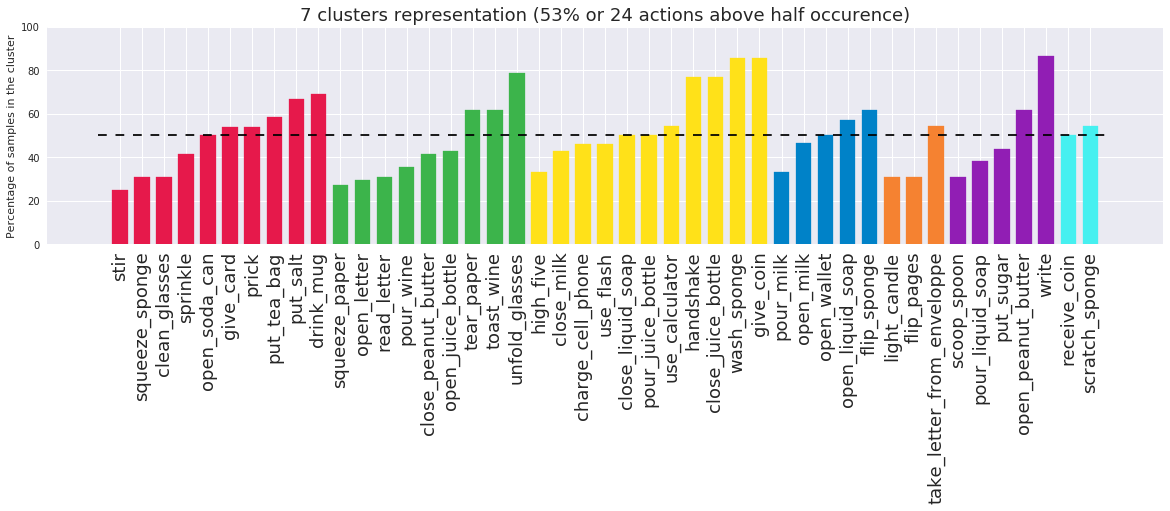


 Accuracy 8 clusters 37.08 % 



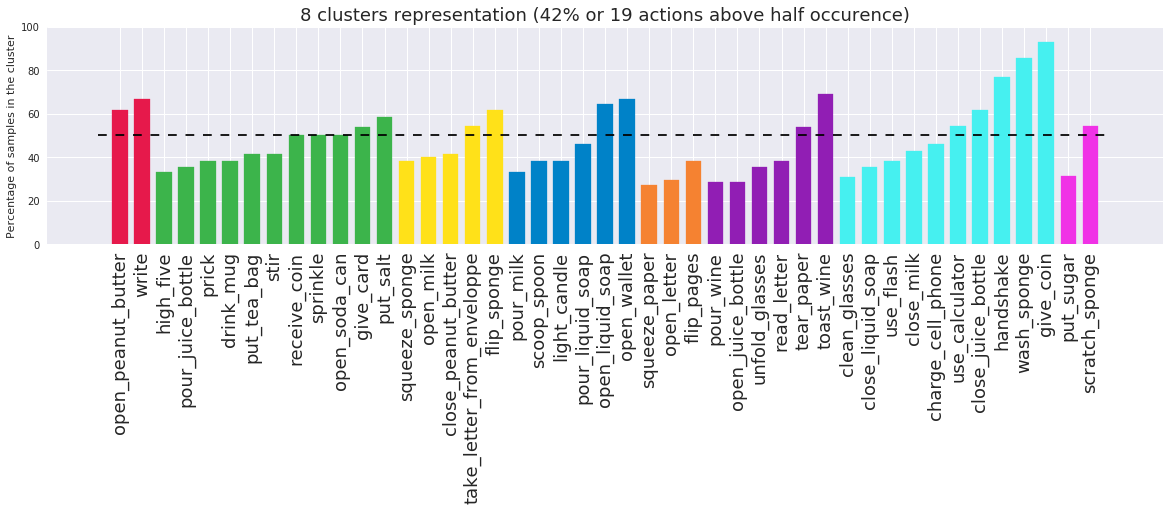


 Accuracy 9 clusters 34.45 % 



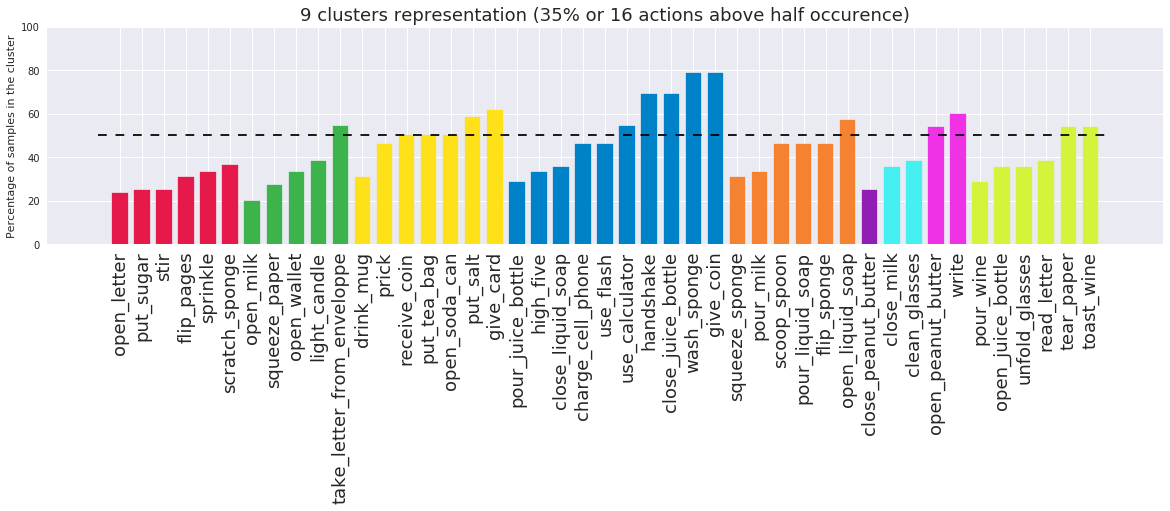


 Accuracy 10 clusters 35.33 % 



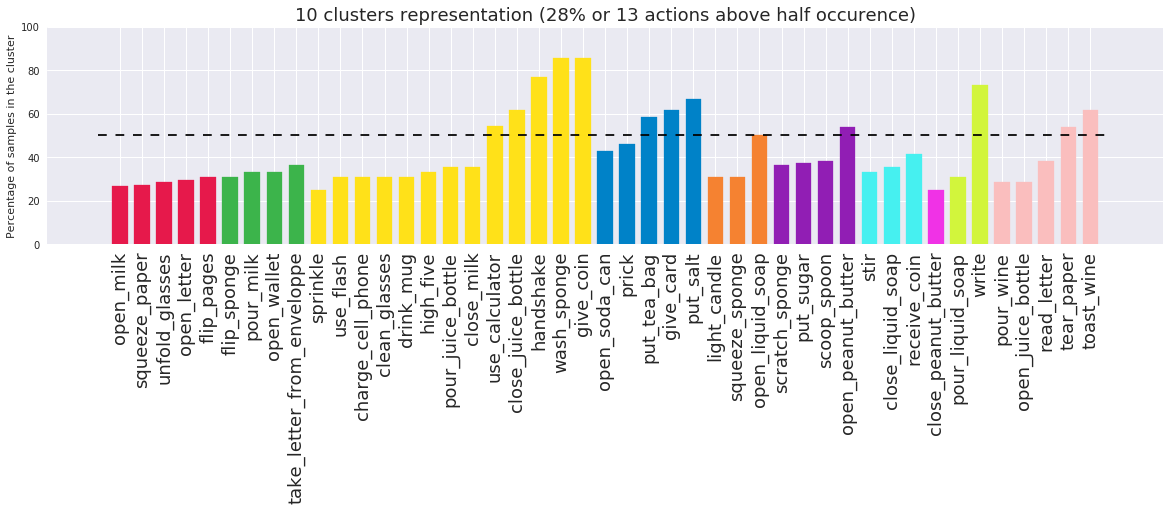


 Accuracy 11 clusters 30.76 % 



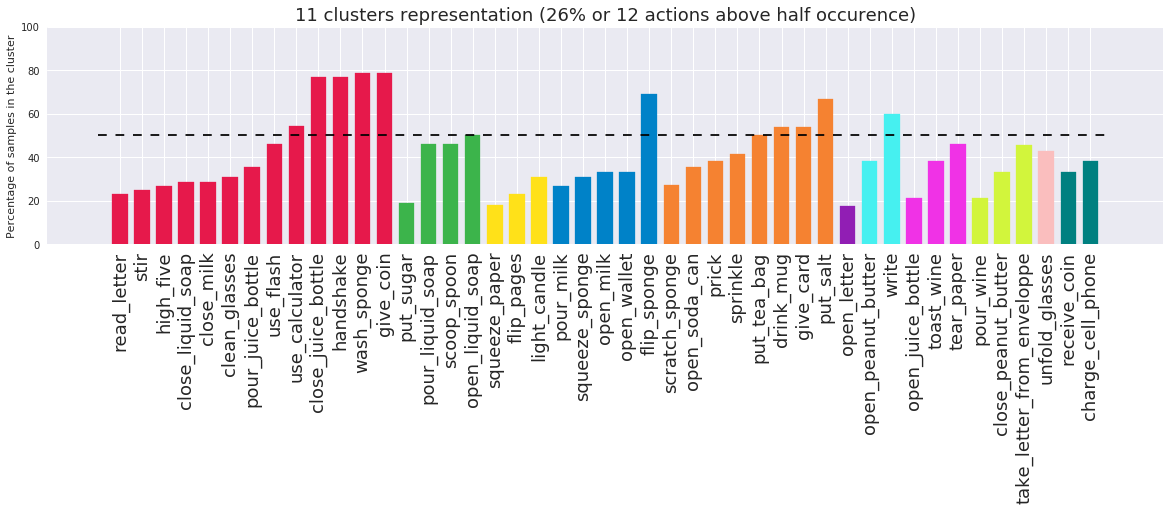


 Accuracy 12 clusters 27.07 % 



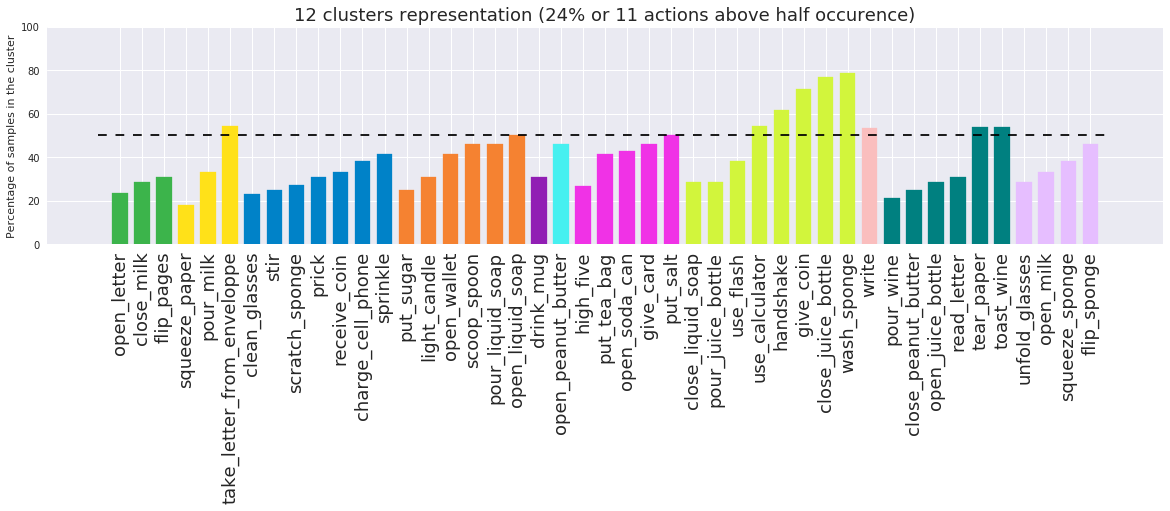


 Accuracy 13 clusters 27.07 % 



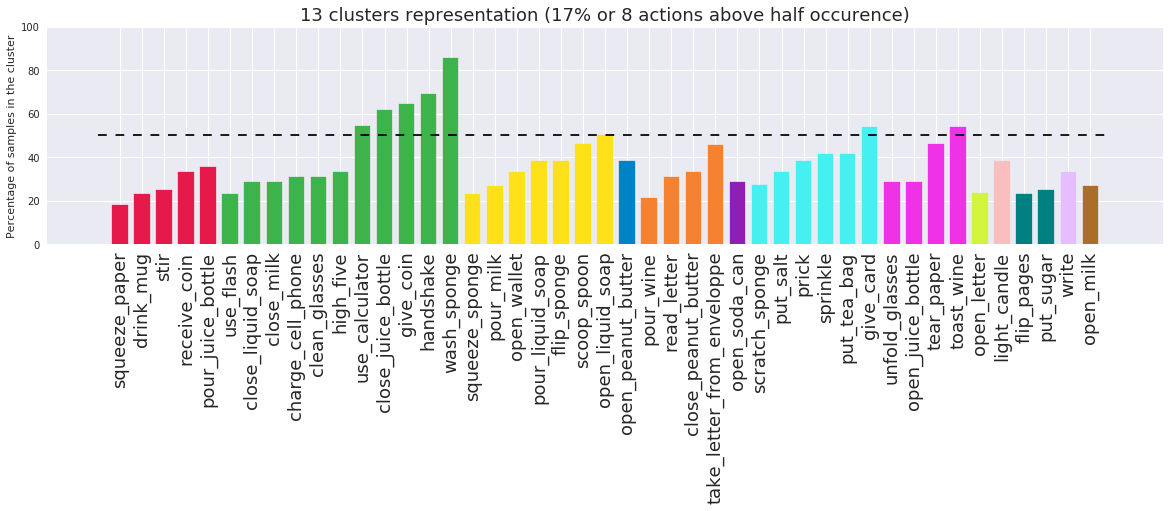


 Accuracy 14 clusters 27.59 % 



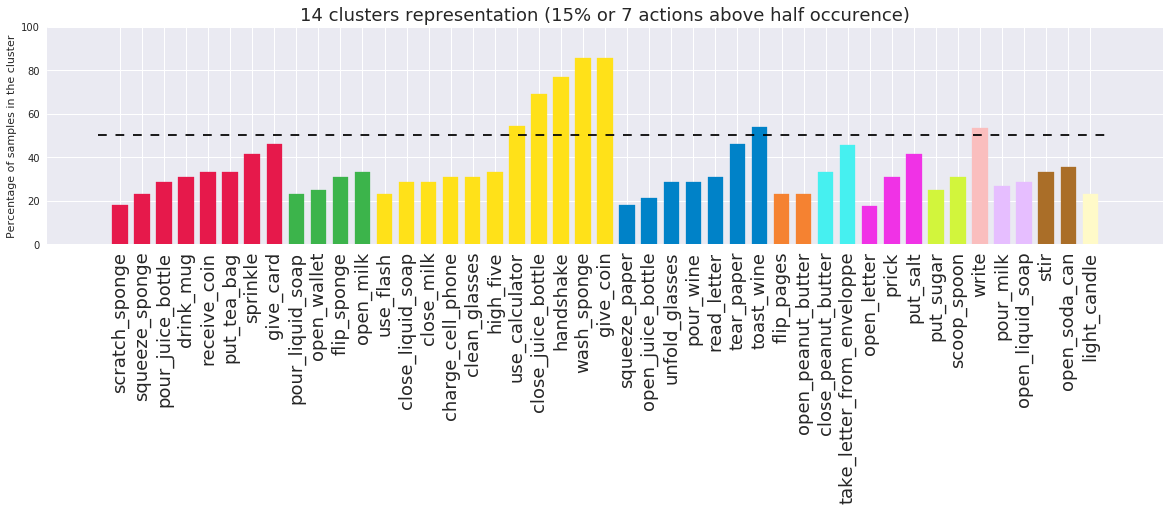


 Accuracy 15 clusters 26.89 % 



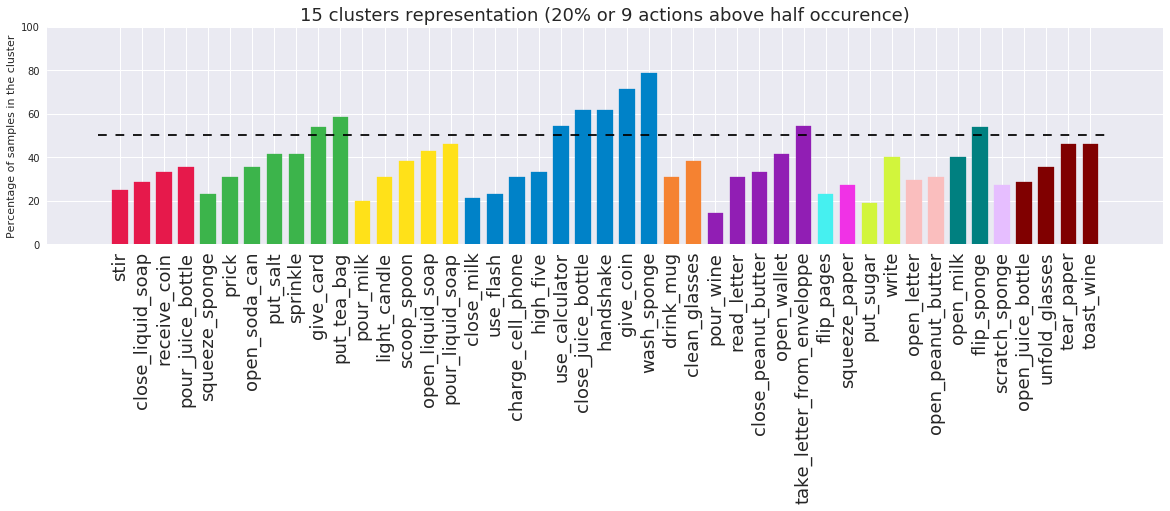


 Accuracy 16 clusters 21.97 % 



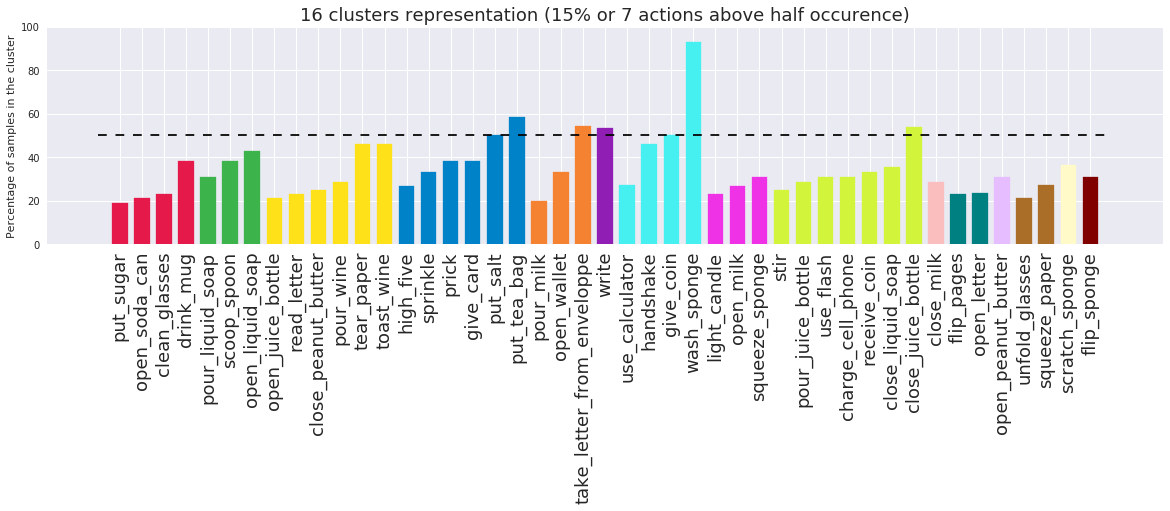


 Accuracy 17 clusters 19.51 % 



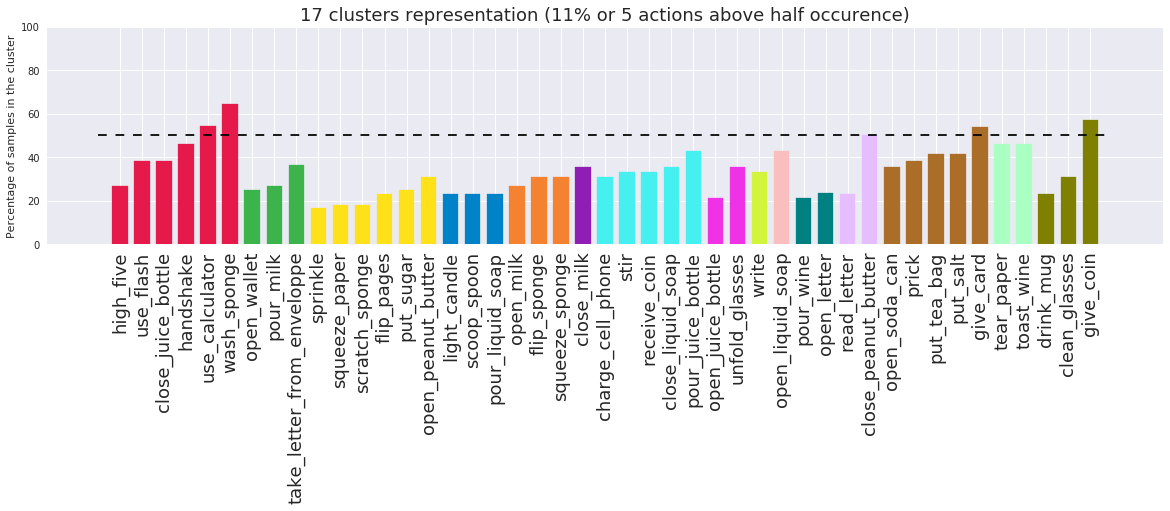


 Accuracy 18 clusters 20.21 % 



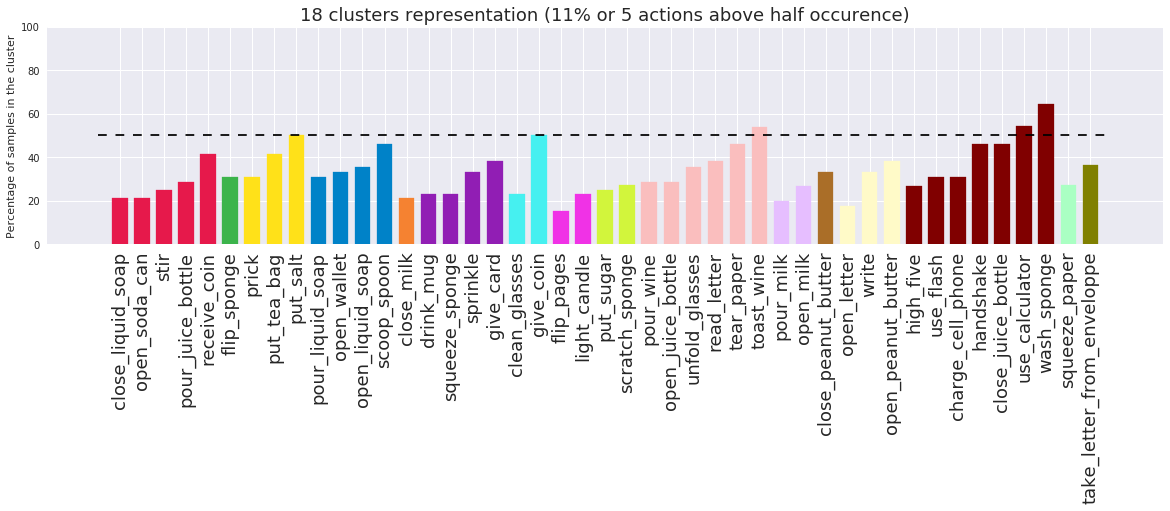


 Accuracy 19 clusters 21.44 % 



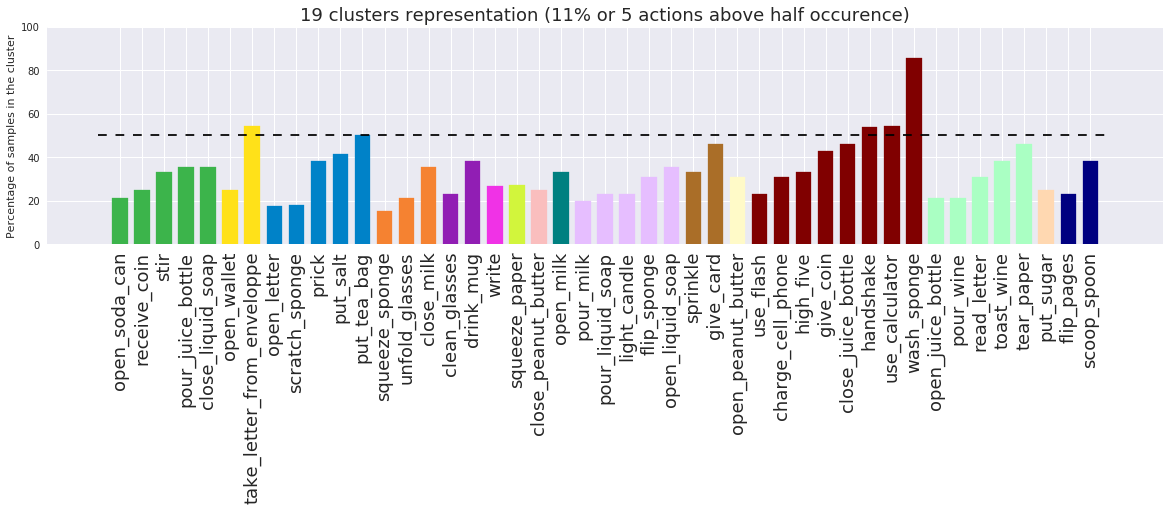


 Accuracy 20 clusters 17.40 % 



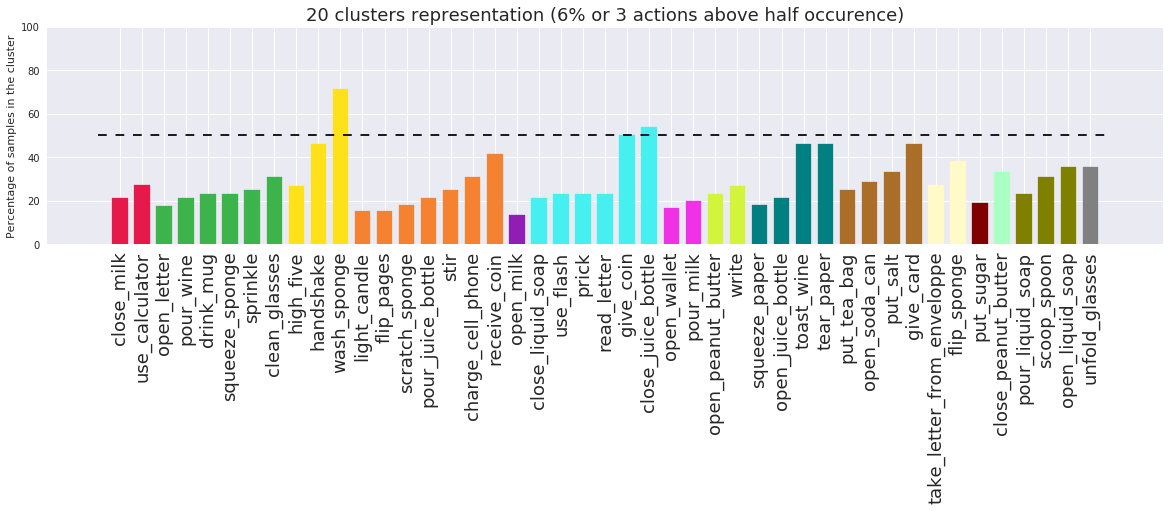


 Accuracy 21 clusters 19.51 % 



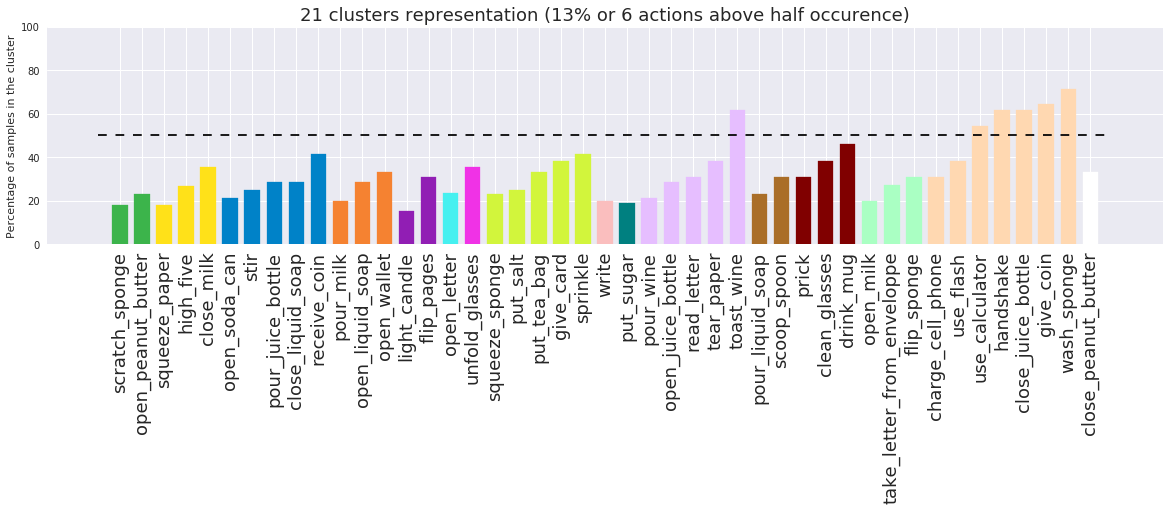


 Accuracy 22 clusters 18.10 % 



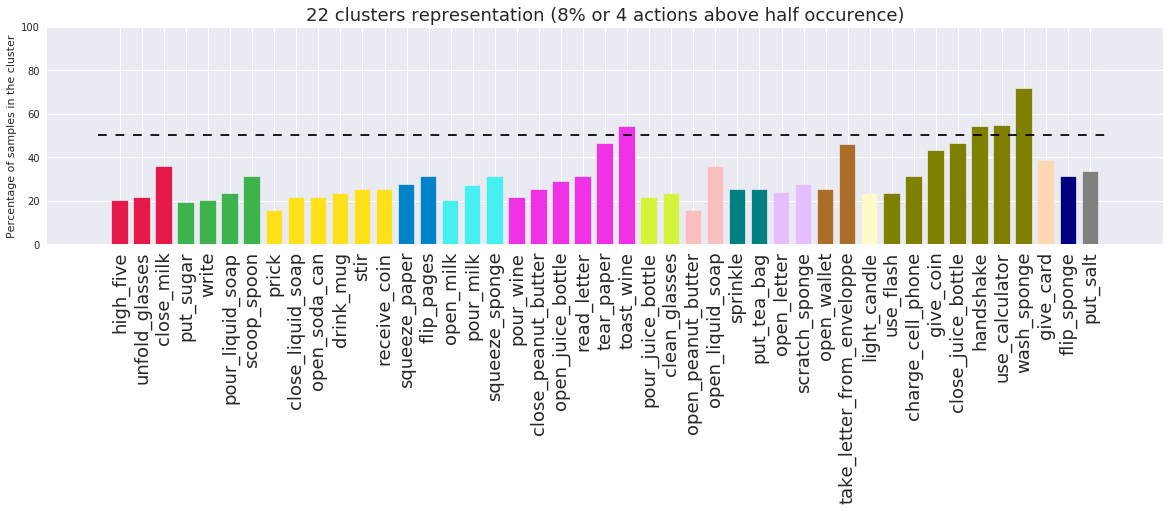


 Accuracy 23 clusters 16.87 % 



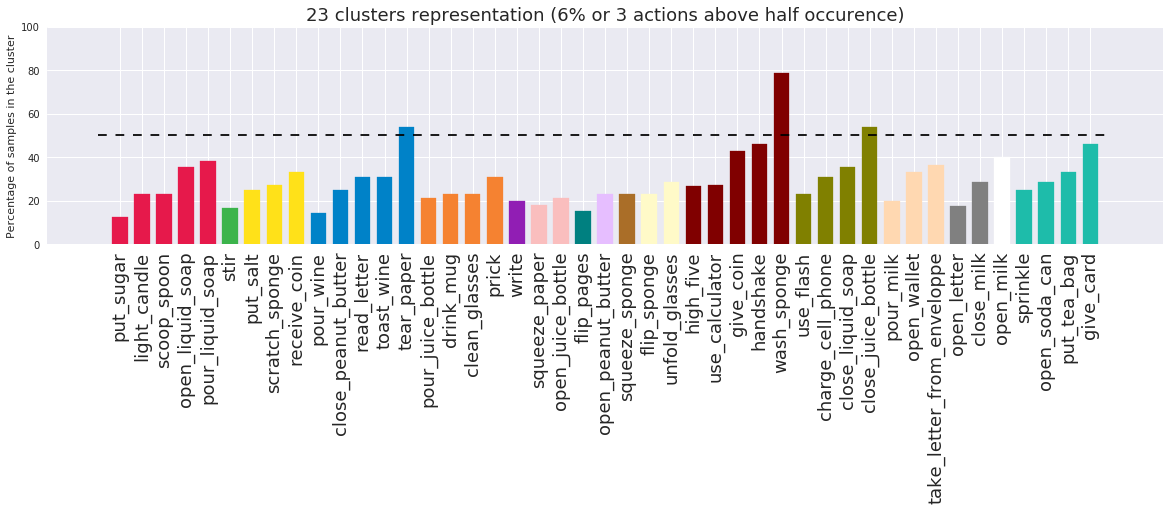


 Accuracy 24 clusters 19.16 % 



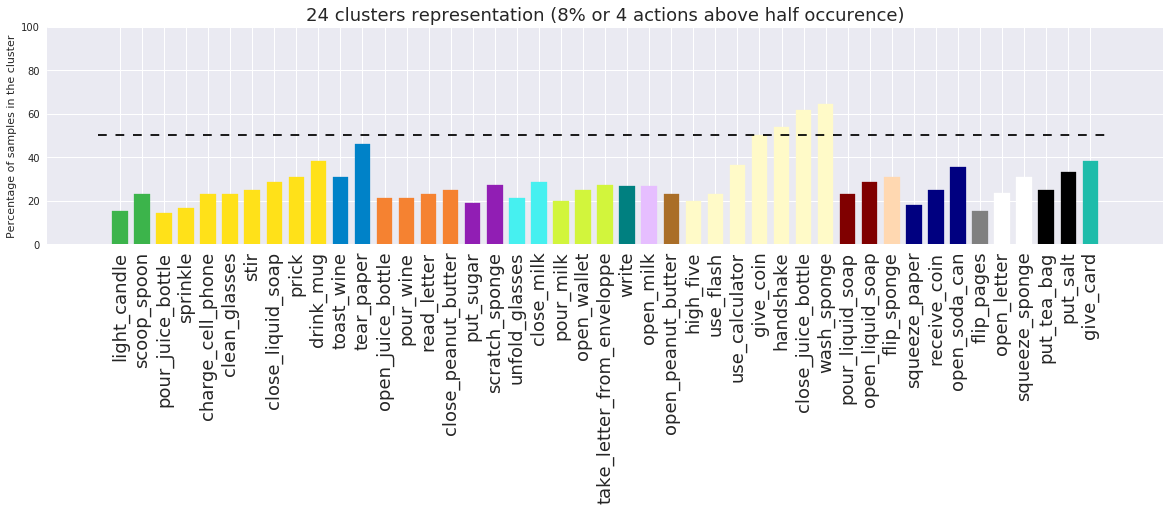


 Accuracy 25 clusters 14.41 % 



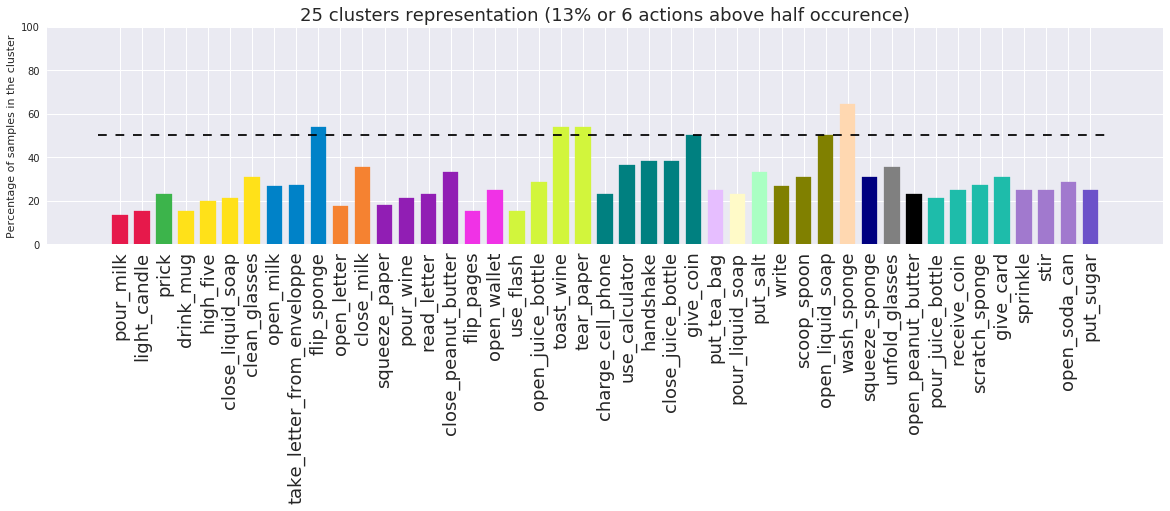


 Accuracy 26 clusters 14.94 % 



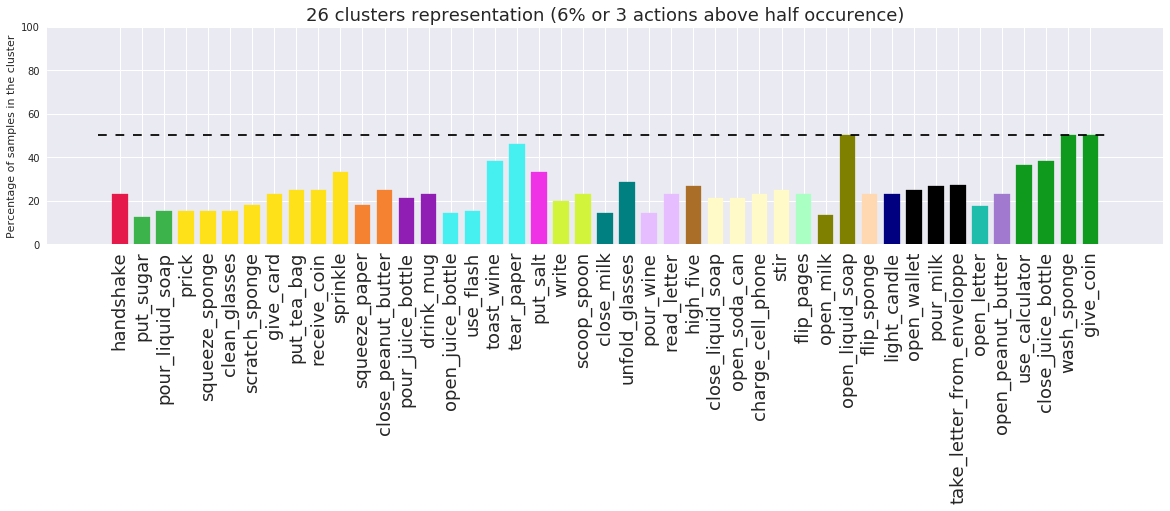


 Accuracy 27 clusters 18.28 % 



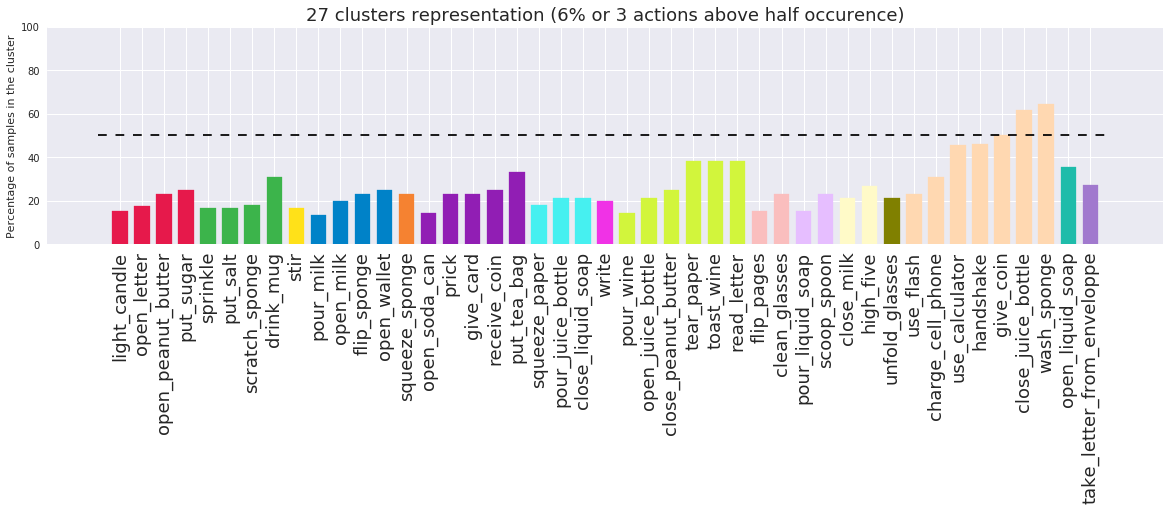


 Accuracy 28 clusters 15.29 % 



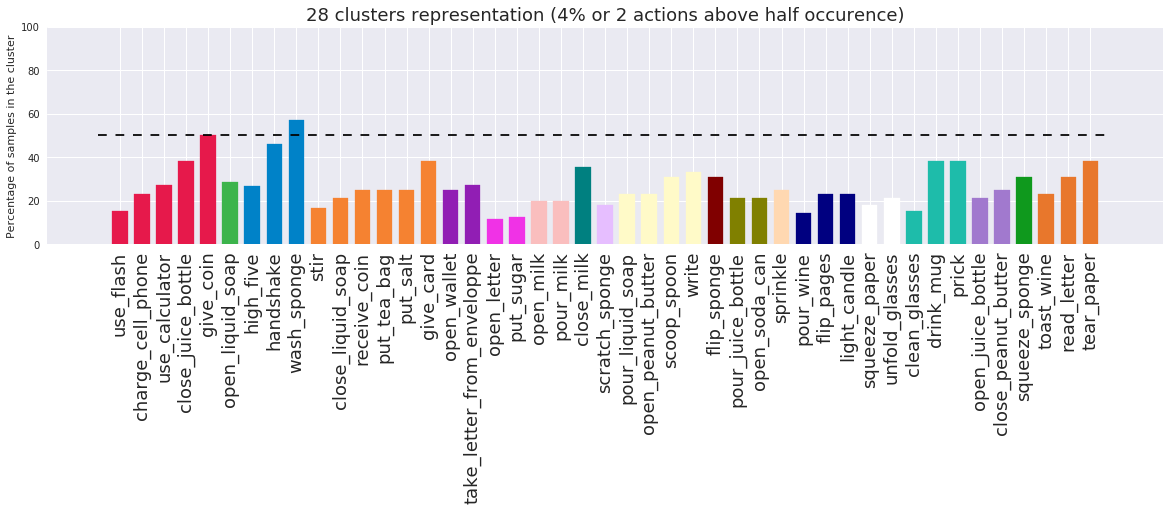


 Accuracy 29 clusters 19.68 % 



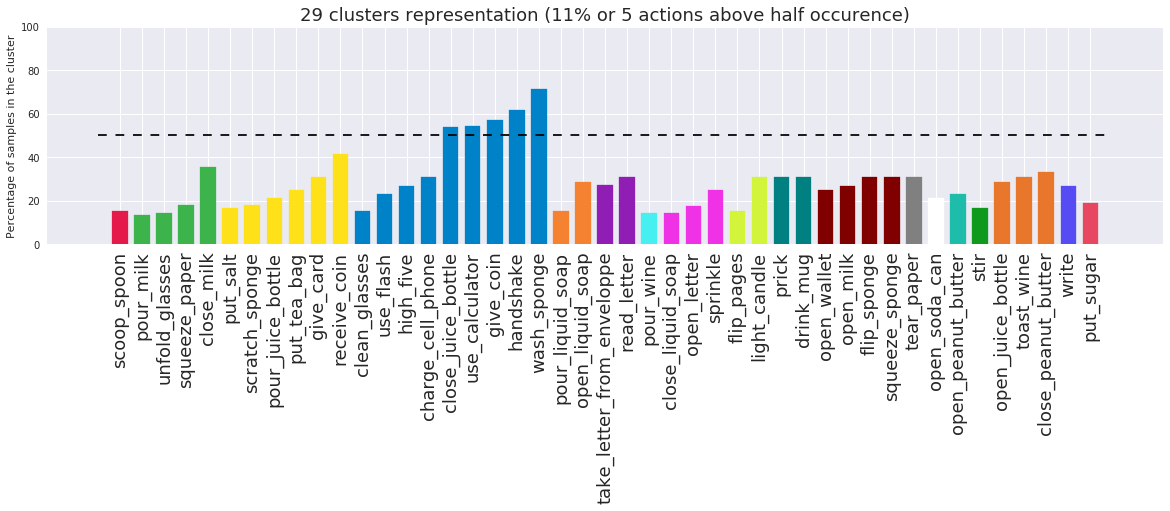


 Accuracy 30 clusters 14.76 % 



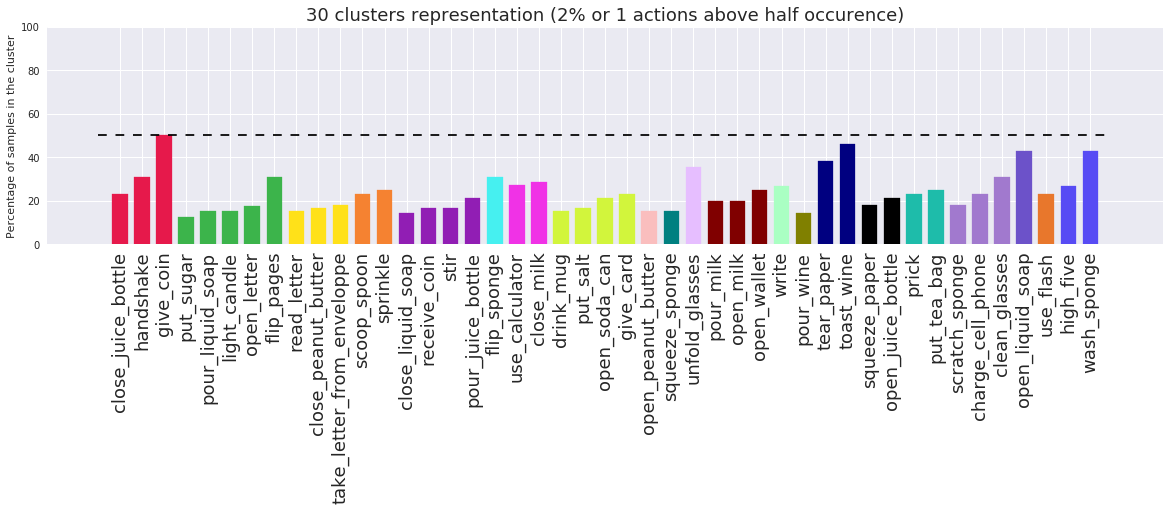


 Accuracy 31 clusters 11.25 % 



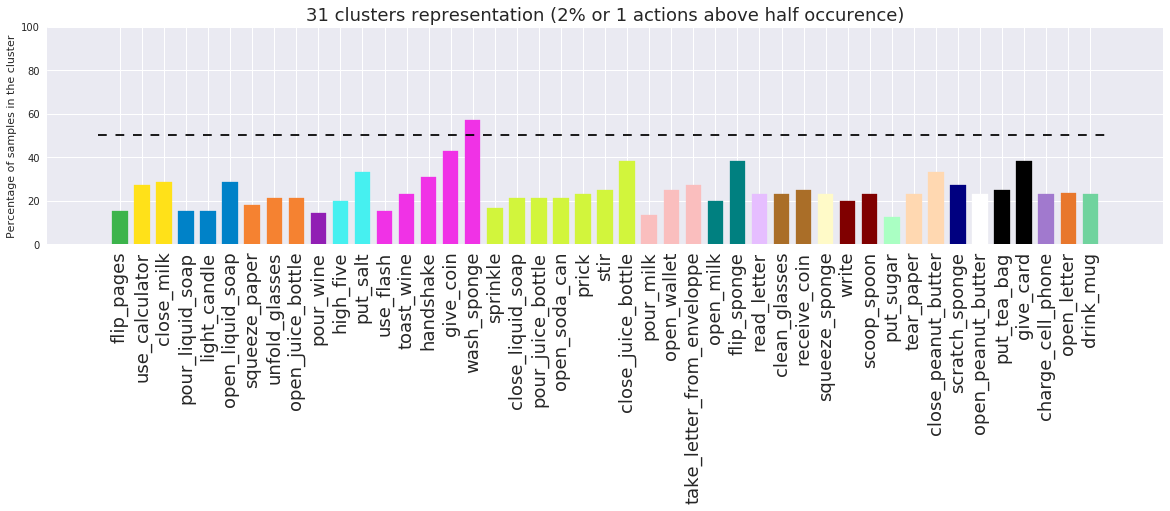


 Accuracy 32 clusters 12.83 % 



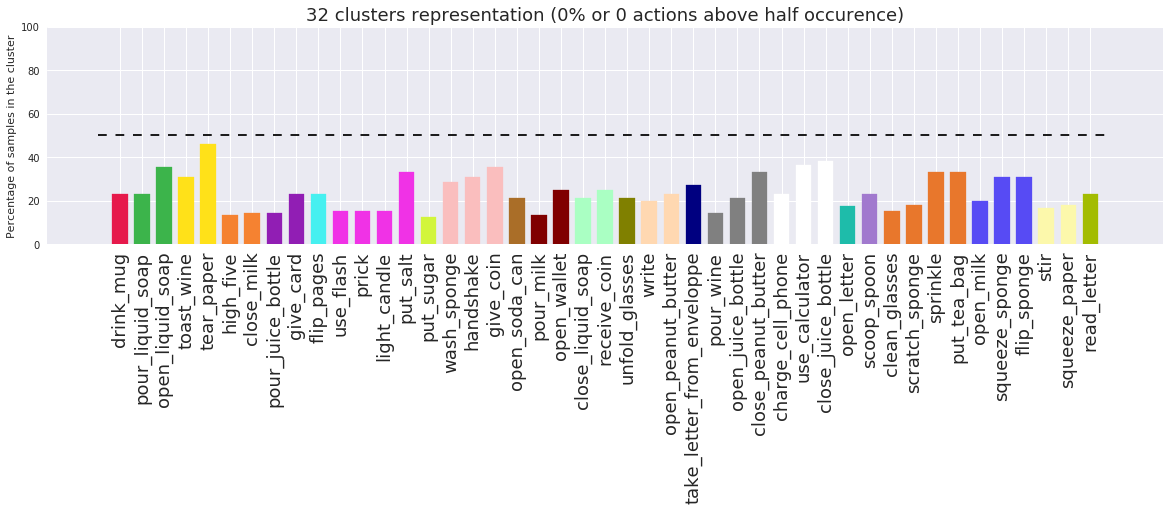


 Accuracy 33 clusters 15.29 % 



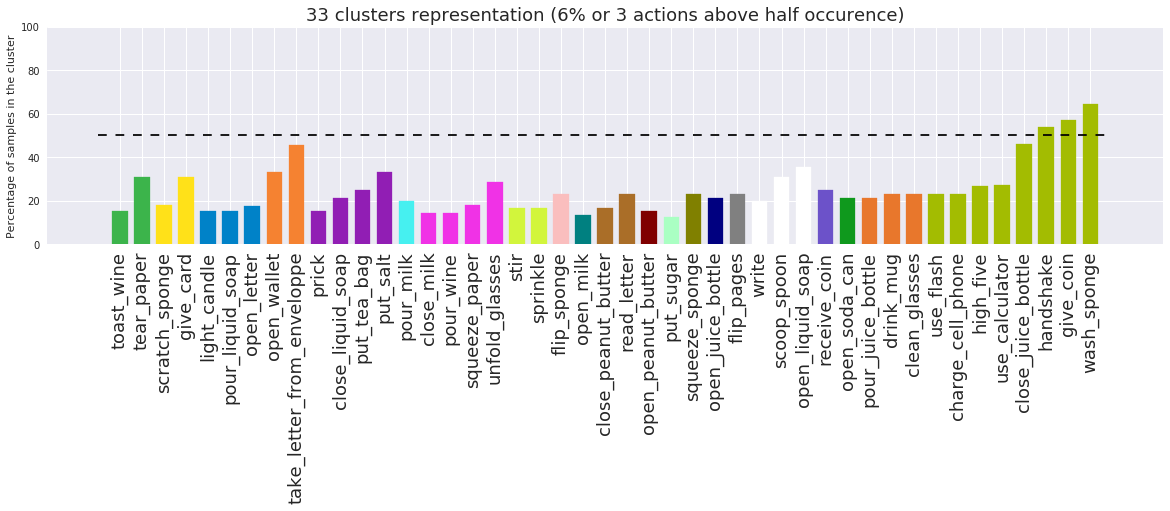


 Accuracy 34 clusters 11.60 % 



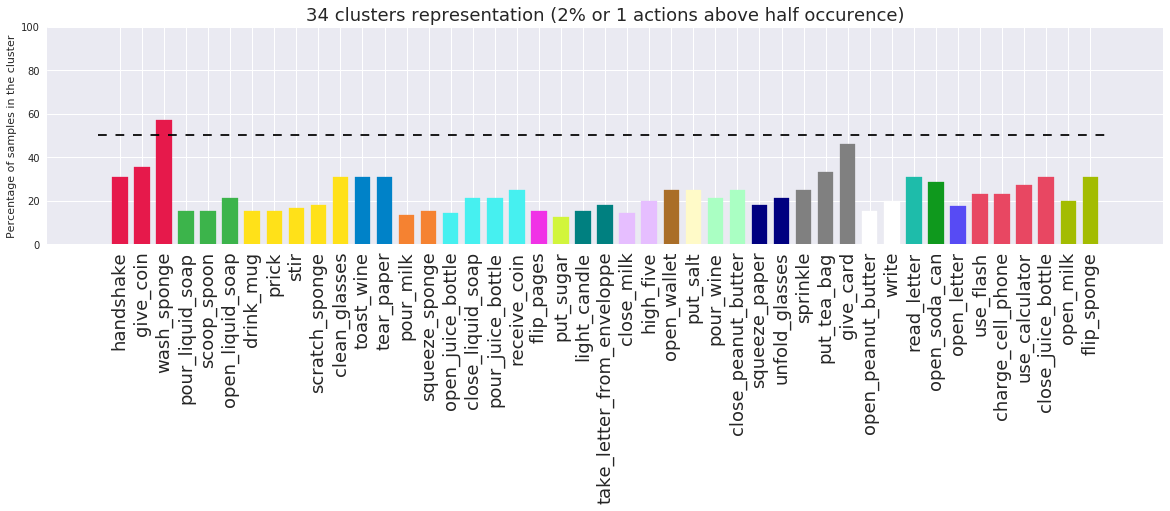


 Accuracy 35 clusters 13.18 % 



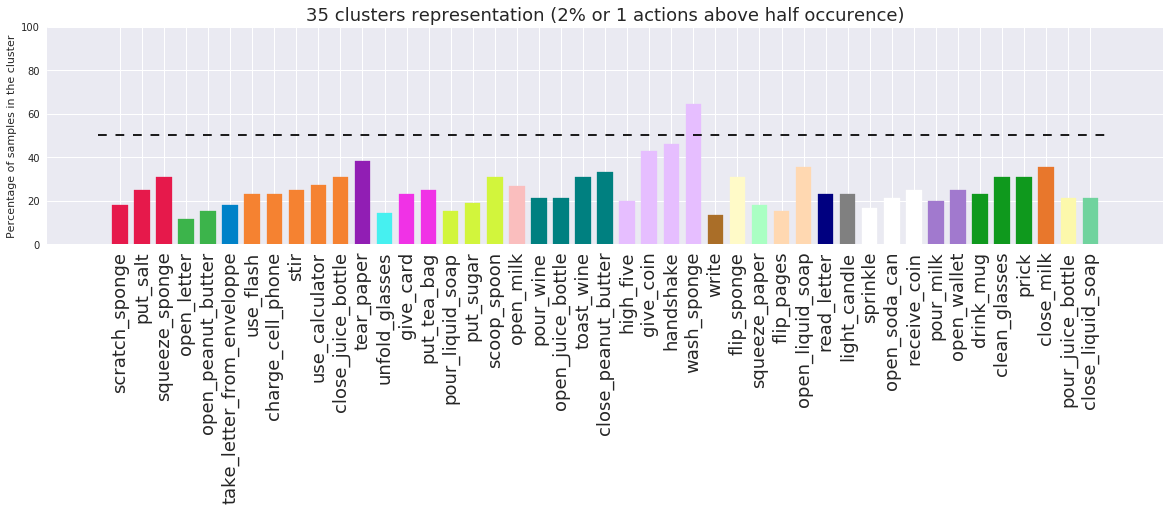


 Accuracy 36 clusters 14.06 % 



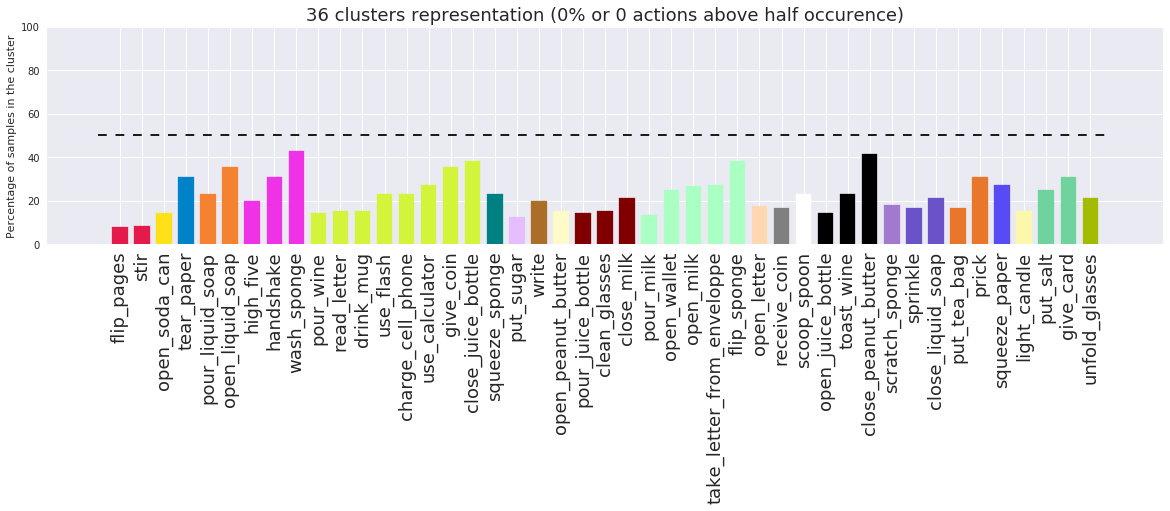


 Accuracy 37 clusters 12.13 % 



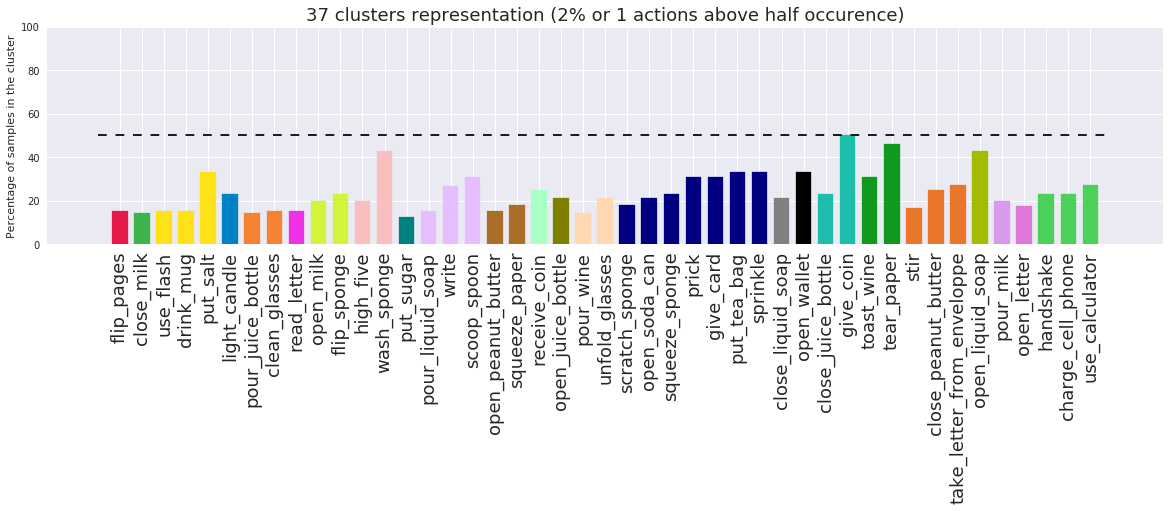


 Accuracy 38 clusters 10.37 % 



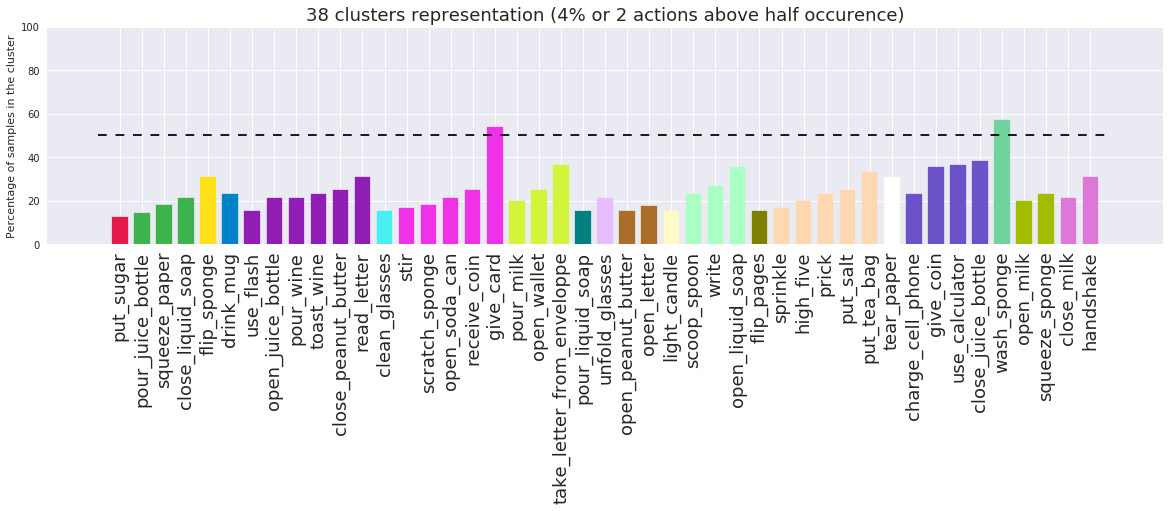


 Accuracy 39 clusters 10.19 % 



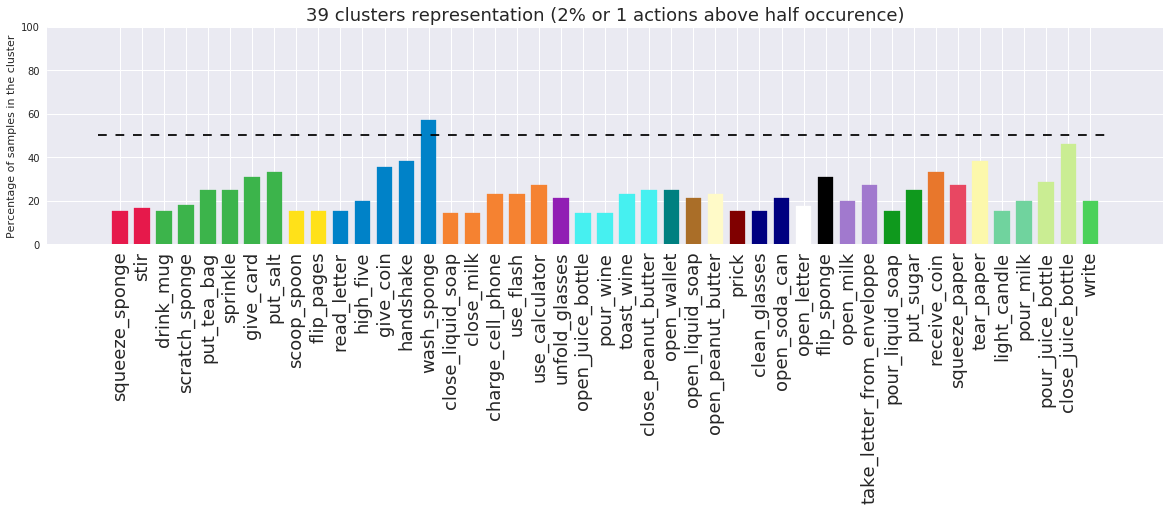


 Accuracy 40 clusters 11.07 % 



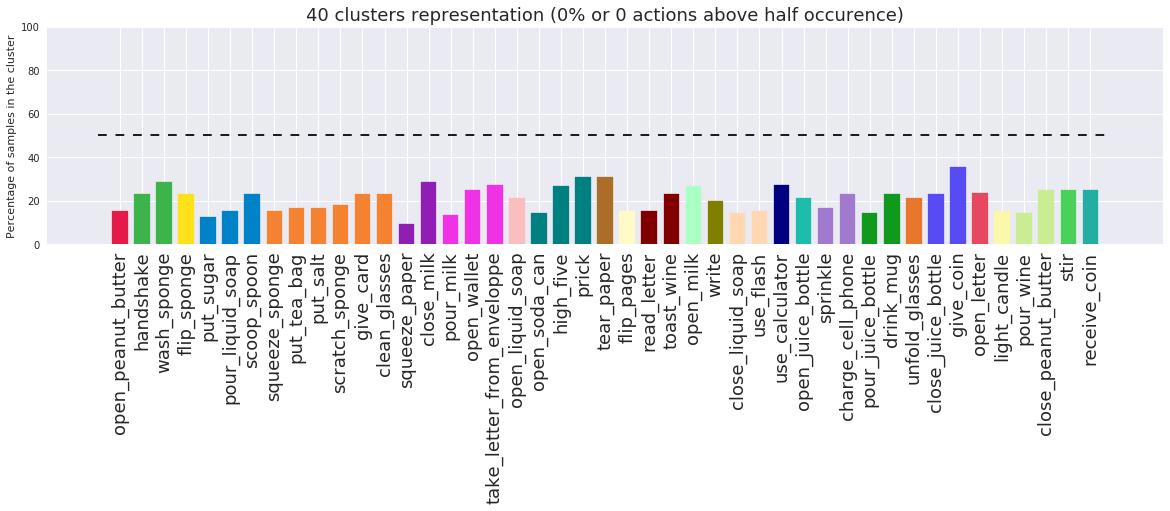


 Accuracy 41 clusters 9.31 % 



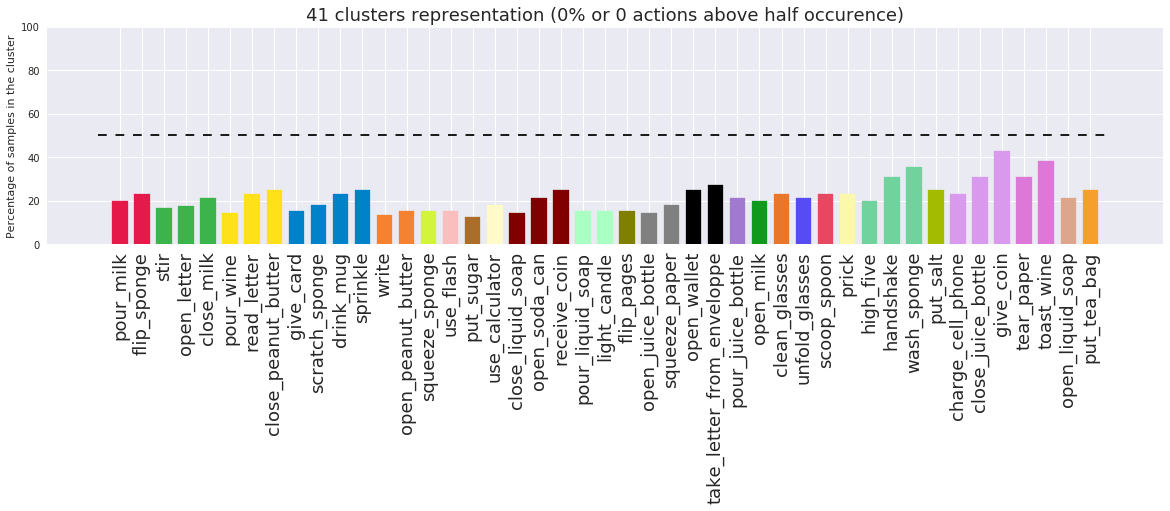


 Accuracy 42 clusters 12.13 % 



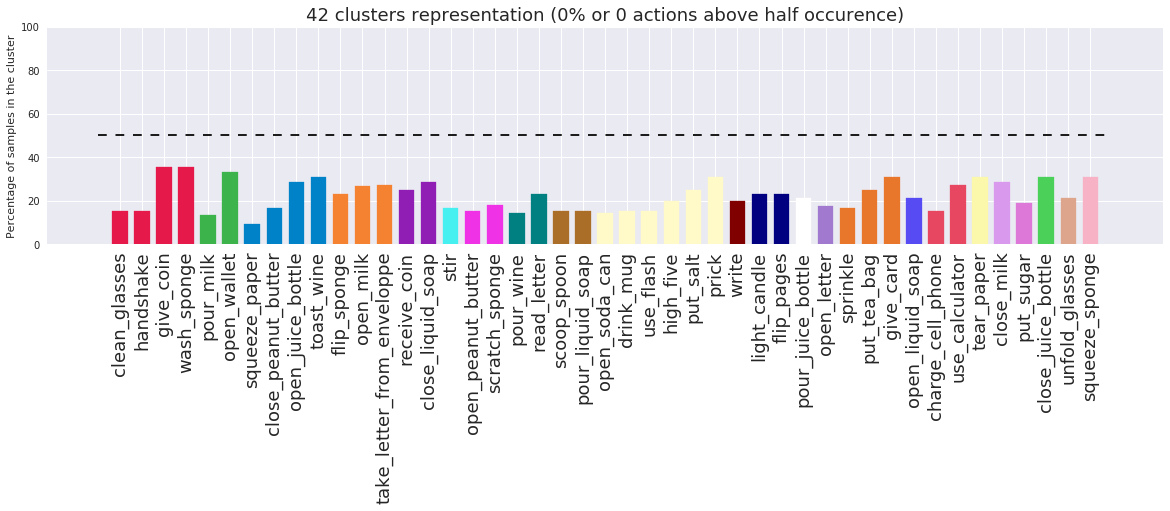


 Accuracy 43 clusters 12.30 % 



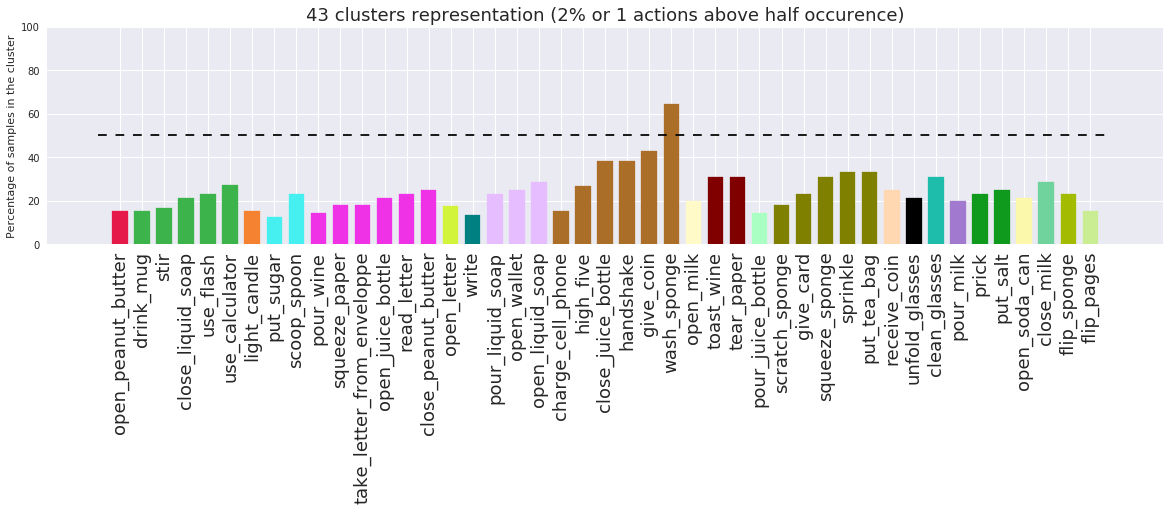


 Accuracy 44 clusters 9.31 % 



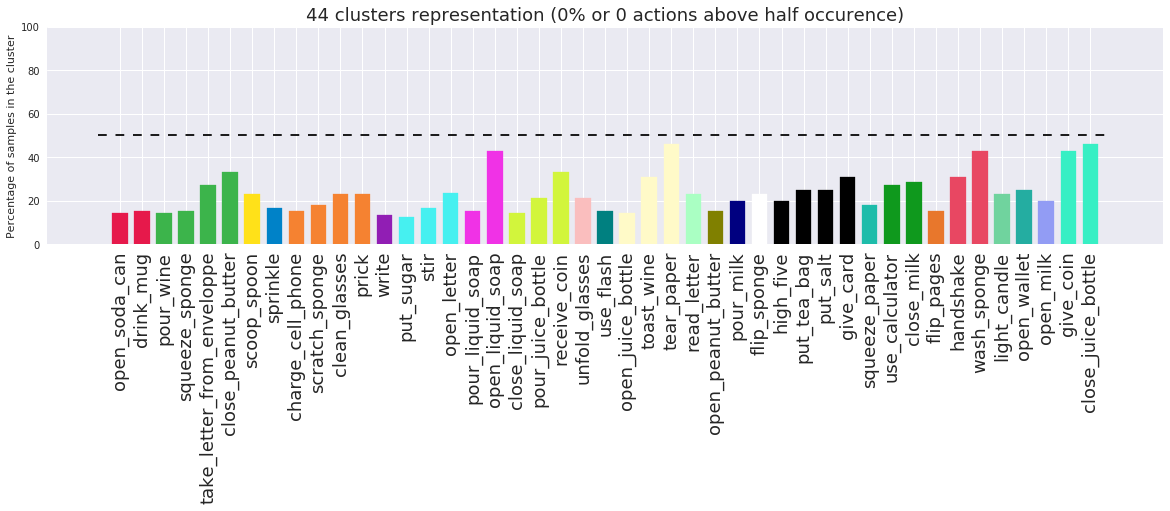


 Accuracy 45 clusters 9.14 % 



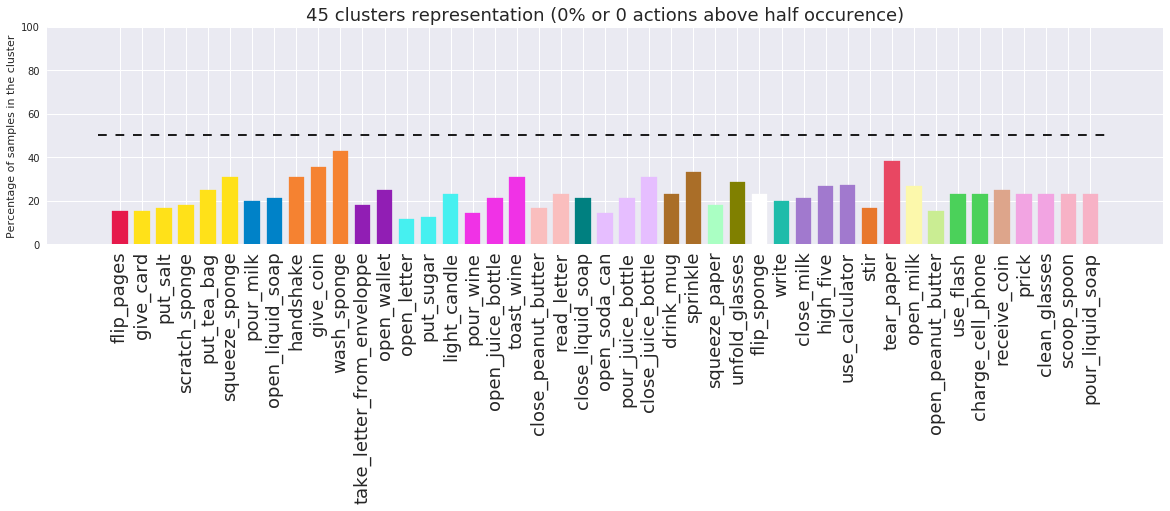

In [13]:
from sklearn.cluster import KMeans

Kmax = 45 #don't go over 45 or bugs
Kmin = 3

sse = {}
acc = np.asarray([])

for K in range(Kmin,Kmax+1):

    kmeans = KMeans(n_clusters=K)
    kmeans.fit(z)
    sse[K] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    y_kmeans = kmeans.predict(z) #used to predict what cluster you belong to

    # know each cluster number is different from label number...
    #Normalise clusters since they have different sizes -> or better, normalize on the percentage it holds of each actions
    #don't hesitate on optimising the kmeans if results are fucked

    K_scores = np.empty((K,45))


    #SHOW EACH CLUSTER ######################################################

    for cluster_number in range(K):

        idx = np.where(y_kmeans == cluster_number) #idx in y_kmeans of points inside this cluster
        actions = true_labels[idx] #action labels of each of those points
        cluster_size = actions.size
        unique, counts = np.unique(actions, return_counts=True) #count number of occurences of each actions in the cluster
        scores = np.zeros(45) #prepare for easy hand over to a graph
        scores[unique] = counts
        scores = 100 * scores / n_action_samples #reduce to percentage of each action inside this cluster

        #confidence_probability (scores, name_labels, cluster_number, cluster_size) #display overlapping clusters

        K_scores[cluster_number] = scores #accumulate results of every cluster in K_scores

    memberships = np.argmax(K_scores, axis=0) #return index of highest value along col <=> return cluster number of where action occurs most
    memberships_scores = np.amax(K_scores, axis=0) #returns highest proportion in that cluster
    #print(np.sum(K_scores, axis=0)) #checking 


    #COMPUTE GROUP RECOGNITION ACCURACY ######################################################

    y_test = kmeans.predict(z_test) 
    test_labels_cluster = [memberships[i] for i in test_labels]
    correct_pred = np.equal(y_test, test_labels_cluster) #output 0 & 1 vector
    accuracy = np.mean(correct_pred)
    acc = np.append(acc, accuracy)
    print("\n Accuracy %i clusters %.2f %% \n" % (K, float(100*accuracy))) 

    #SHOW ALL CLUSTERS ######################################################

    
    
    #sort per cluster members before passing
    idx = np.argsort(memberships) 
    memberships = memberships[idx]
    memberships_scores = memberships_scores[idx]
    memberships_name = name_labels[idx]

    #sort inside each cluster now
    for cluster_number in range(K):

        idx_cluster = np.where(memberships == cluster_number) #index of who is in this clutser

        this_scores = memberships_scores[idx_cluster] #select scores in this cluster
        this_members = memberships[idx_cluster] 
        this_names = memberships_name[idx_cluster] 

        idx_sort = np.argsort(this_scores) #and get index of how to sort

        memberships_scores[idx_cluster] = this_scores[idx_sort]
        memberships[idx_cluster] = this_members[idx_sort]
        memberships_name [idx_cluster] = this_names[idx_sort]

    confidence_probability_cluster (memberships_scores, memberships, memberships_name, K) #color as a function of cluster it belongs to


#COMPUTE LOSS (ELBOW METHOD) ######################################################

#plot_inertia(sse) 
#plot_accuracy(acc)

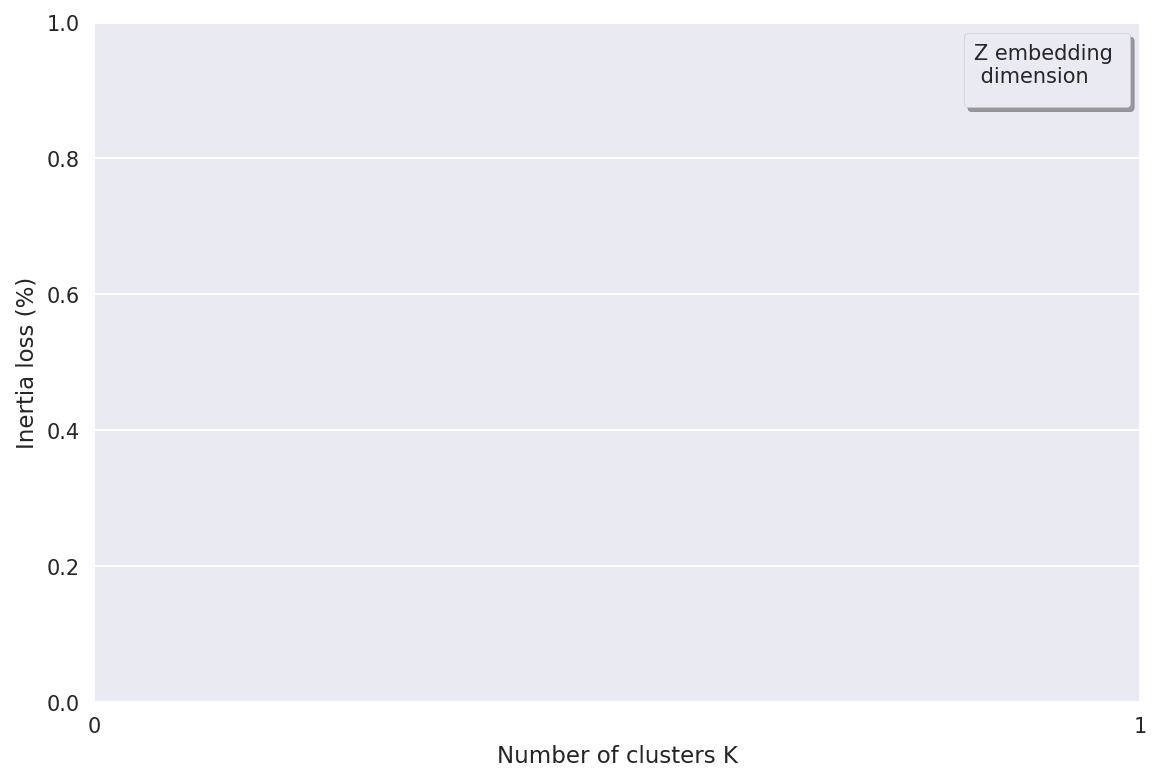

NameError: name 'MAsse8' is not defined

<Figure size 432x288 with 0 Axes>

In [15]:
#SSE

plt.figure(figsize=(9,6), dpi=150)

from matplotlib.ticker import MaxNLocator
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

#plt.plot(range(2,Kmax+1), MAsse8, label='8')
#plt.plot(range(2,Kmax+1), MAsse16, label='16')
#plt.plot(range(2,Kmax+1), MAsse32, label='32')
#plt.plot(range(2,Kmax+1), MAsse45, label='45')
plt.xlabel("Number of clusters K")
plt.ylabel("SSE")
plt.ylabel("Inertia loss (%)")

plt.legend(title="Z embedding \n dimension", frameon=True, fancybox=True, framealpha=1, shadow=True, borderpad=0.5)
plt.savefig('curve_plot_sse.png', bbox_inches='tight', dpi='figure')
plt.show()

plt.figure()
MAsse8 = sse
plt.plot(range(2,Kmax+1), MAsse8/range(2,Kmax+1))
plt.show


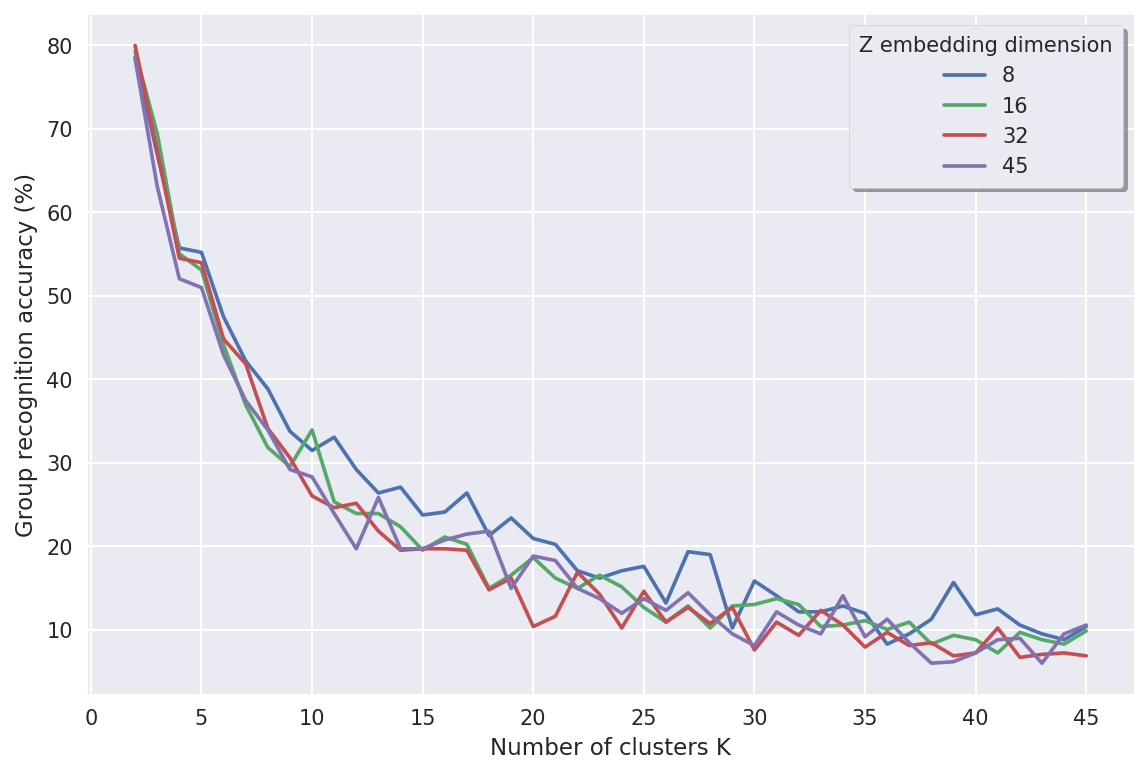

In [141]:
#ACCU

plt.figure(figsize=(9,6), dpi=150)

from matplotlib.ticker import MaxNLocator
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.plot(range(2,Kmax+1), acc8*100, label='8')
plt.plot(range(2,Kmax+1), acc16*100, label='16')
plt.plot(range(2,Kmax+1), acc32*100, label='32')
plt.plot(range(2,Kmax+1), acc45*100, label='45')
plt.xlabel("Number of clusters K")
plt.ylabel("Group recognition accuracy (%)")

plt.legend(title="Z embedding dimension", frameon=True, fancybox=True, framealpha=1, shadow=True, borderpad=0.5)
plt.savefig('curve_plot_acc.png', bbox_inches='tight', dpi='figure')

plt.show()

In [92]:
>>> import numpy as np
>>> d = {'a':1,'b':2,'c':3}
>>> np.fromiter(sse.itervalues(), dtype=np.int)  # I'm on Python 2.7


array([24712, 23962, 23501, 23179, 22942, 22746, 22598, 22385, 22215,
       22057, 21938, 21858, 21613, 21642, 21463, 21446, 21276, 21155,
       20959, 20930, 20856, 20729, 20747, 20539, 20478, 20443, 20354,
       20302, 20216, 20090, 20037, 20024, 19919, 19831, 19749, 19649,
       19591, 19584, 19454, 19386, 19301, 19320, 19251, 19146])

In [91]:
print(sse)

{2: 24712.771792689455, 3: 23962.80345834544, 4: 23501.590873795285, 5: 23179.657424151257, 6: 22942.317418697752, 7: 22746.603391173834, 8: 22598.609885711685, 9: 22385.214359069334, 10: 22215.371098037074, 11: 22057.893895661793, 12: 21938.289203812834, 13: 21858.11002741389, 14: 21613.628091617673, 15: 21642.22202113155, 16: 21463.758130232112, 17: 21446.565912729337, 18: 21276.01980072783, 19: 21155.58176077836, 20: 20959.649596810566, 21: 20930.82725987297, 22: 20856.04626845911, 23: 20729.16664298655, 24: 20747.142970849178, 25: 20539.10850115985, 26: 20478.88655382814, 27: 20443.751637645753, 28: 20354.442116864673, 29: 20302.350469930258, 30: 20216.79527248726, 31: 20090.110838915312, 32: 20037.551293014472, 33: 20024.33998992812, 34: 19919.06867040434, 35: 19831.128206553585, 36: 19749.692024986965, 37: 19649.150098432812, 38: 19591.935104749715, 39: 19584.80323442268, 40: 19454.050605424643, 41: 19386.00239433474, 42: 19301.46148403002, 43: 19320.71708468683, 44: 19251.087289